# Orbital speed & period

## Mean orbital speed

$\large v \approx \sqrt{\frac{\mu}{r}}$

Where:

$v$ - mean orbital speed, in $m/s$

$\mu = GM_{body}$ - Standard gravitational parameter

$G$ - Gravitational constant ($G \approx 6.674*10^{-11} N \cdot kg^{-2} \cdot m^{2}$)

$M_{body}$ - Body mass in kilograms

$r$ - radius satellite is currently at


Or, using gravitational accelleration

$\large v \approx \sqrt{2g_{0}r}$

Where:

$g_{0}$ - is the surface gravity ($g_{0} = 9.80665 \frac{m}{s^2}$)

In [1]:
import numpy as np

In [2]:
G_CONST = 6.674 * 10**-11

def mean_orbital_speed(mu_body, r):
    return np.sqrt(mu_body / r)

def std_grav_param(body_mass):
    return G_CONST * body_mass

## Precise orbital speed

Precise speed of a body at any given point in its trajectory [$m/s$]

$\large v = \sqrt{ \mu (\frac{2}{r} - \frac{1}{a}) }$

Where:

$a$ - semi-major axis

## Escape velocity

$\large v_e = \sqrt{\frac{2\mu}{r}}$

In [3]:
def escape_velocity(mu_body, r):
    return np.sqrt((2 * mu_body) / r)

## Orbital period

$\large t = 2\pi \sqrt{\frac{r^{3}}{\mu}}$

Where:

$t$ - time for a complete orbit, in $s$

In [4]:
def orbital_period(mu_body, r):
    return 2 * np.pi * np.sqrt(np.power(r, 3) / mu_body)

## Circular speed

In case we want to know what is the cirtular speed (e.g. at a ground level) for a satellite, given orbital period:

$\large v_c = 2\pi *\frac{r}{t}$

Where:

$v$ - circular speed, in $m/s$

$t$ - orbital period, in $s$

In [5]:
def circular_speed(t, r):
    return 2 * np.pi * r / t

## Examples

### Mean orbital speed and escape velocity at the altitude

In [6]:
import matplotlib.pyplot as plt
import matplotlib

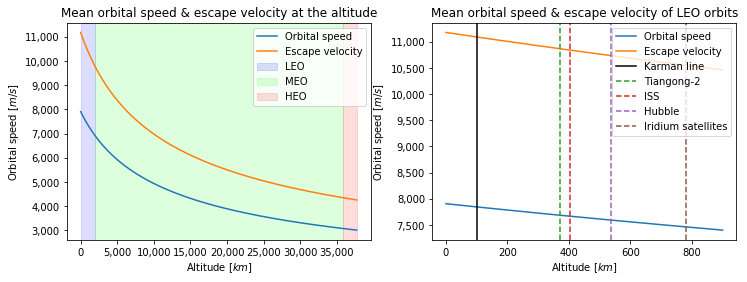

In [7]:
EARTH_MASS = 5.97237 * 10**24
MU_EARTH = std_grav_param(EARTH_MASS)

EARTH_RADIUS = 6.3781 * 10**6
LEO_ORBIT = 100
MEO_ORBIT = 2000
HEO_ORBIT = 35786

r = np.arange(0, HEO_ORBIT + 2000, 100)

v = mean_orbital_speed(MU_EARTH, EARTH_RADIUS + (r * 10**3))
ev = escape_velocity(MU_EARTH, EARTH_RADIUS + (r * 10**3))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
formatter = matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)))

ax[0].plot(r, v, label='Orbital speed')
ax[0].plot(r, ev, label='Escape velocity')
ax[0].axvspan(LEO_ORBIT,  MEO_ORBIT, color='#0000ff22', label='LEO')
ax[0].axvspan(MEO_ORBIT, HEO_ORBIT, color='#00ff0022', label='MEO')
ax[0].axvspan(HEO_ORBIT, HEO_ORBIT + 2000, color='#ff000022', label='HEO')
ax[0].get_xaxis().set_major_formatter(formatter)
ax[0].get_yaxis().set_major_formatter(formatter)
ax[0].set_title('Mean orbital speed & escape velocity at the altitude')
ax[0].set_xlabel('Altitude [$km$]')
ax[0].set_ylabel('Orbital speed [$m/s$]')
ax[0].legend(loc='upper right')

ax[1].plot(r[:10], v[:10], label='Orbital speed')
ax[1].plot(r[:10], ev[:10], label='Escape velocity')
ax[1].axvline(100, color='k', linestyle='-', label='Karman line')
ax[1].axvline(370, color='C2', linestyle='--', label='Tiangong-2')
ax[1].axvline(404, color='C3', linestyle='--', label='ISS')
ax[1].axvline(538, color='C4', linestyle='--', label='Hubble')
ax[1].axvline(780, color='C5', linestyle='--', label='Iridium satellites')

ax[1].get_xaxis().set_major_formatter(formatter)
ax[1].get_yaxis().set_major_formatter(formatter)
ax[1].set_title('Mean orbital speed & escape velocity of LEO orbits')
ax[1].set_xlabel('Altitude [$km$]')
ax[1].set_ylabel('Orbital speed [$m/s$]')
ax[1].legend(loc='upper right')

plt.show();

**Observe**

- Mean orbital speed and escape velocity decreases with distance ([3rd Kepler Law](https://en.wikipedia.org/wiki/Kepler's_laws_of_planetary_motion#Third_law_of_Kepler))
- The limit of mean orbital speed and escape velocity, as altitude approaches infinity, is 0 

### Orbital period and ground speed

In [8]:
# Earth's equatorial rotation velocity
earth_period = 23 * 3600 + 56 * 60 + 4
earth_v = circular_speed(earth_period, EARTH_RADIUS)

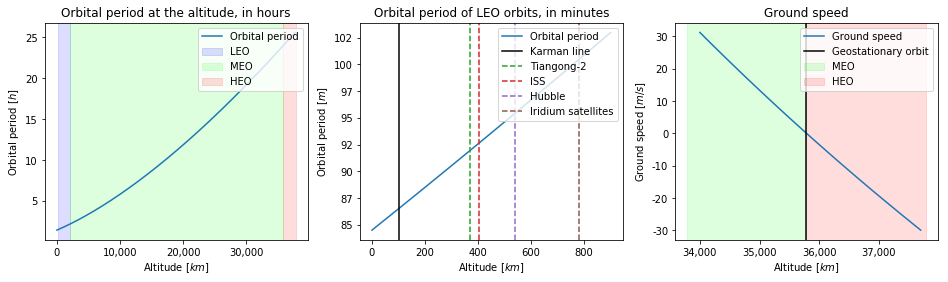

In [9]:
t = orbital_period(MU_EARTH, EARTH_RADIUS + (r * 10**3))
v_c = circular_speed(t, EARTH_RADIUS) - earth_v

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
formatter = matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)))

ax[0].plot(r, t / 3600, label='Orbital period')
ax[0].axvspan(LEO_ORBIT,  MEO_ORBIT, color='#0000ff22', label='LEO')
ax[0].axvspan(MEO_ORBIT, HEO_ORBIT, color='#00ff0022', label='MEO')
ax[0].axvspan(HEO_ORBIT, HEO_ORBIT + 2000, color='#ff000022', label='HEO')
ax[0].get_xaxis().set_major_formatter(formatter)
ax[0].get_yaxis().set_major_formatter(formatter)
ax[0].set_title('Orbital period at the altitude, in hours')
ax[0].set_xlabel('Altitude [$km$]')
ax[0].set_ylabel('Orbital period [$h$]')
ax[0].legend(loc='upper right')

ax[1].plot(r[:10], t[:10] / 60, label='Orbital period')
ax[1].axvline(100, color='k', linestyle='-', label='Karman line')
ax[1].axvline(370, color='C2', linestyle='--', label='Tiangong-2')
ax[1].axvline(404, color='C3', linestyle='--', label='ISS')
ax[1].axvline(538, color='C4', linestyle='--', label='Hubble')
ax[1].axvline(780, color='C5', linestyle='--', label='Iridium satellites')

ax[1].get_xaxis().set_major_formatter(formatter)
ax[1].get_yaxis().set_major_formatter(formatter)
ax[1].set_title('Orbital period of LEO orbits, in minutes')
ax[1].set_xlabel('Altitude [$km$]')
ax[1].set_ylabel('Orbital period [$m$]')
ax[1].legend(loc='upper right')

ax[2].plot(r[340:], v_c[340:], label='Ground speed')
ax[2].axvline(HEO_ORBIT, color='k', linestyle='-', label='Geostationary orbit')
ax[2].axvspan(HEO_ORBIT - 2000, HEO_ORBIT, color='#00ff0022', label='MEO')
ax[2].axvspan(HEO_ORBIT, HEO_ORBIT + 2000, color='#ff000022', label='HEO')
ax[2].get_xaxis().set_major_formatter(formatter)
ax[2].get_yaxis().set_major_formatter(formatter)
ax[2].set_title('Ground speed')
ax[2].set_xlabel('Altitude [$km$]')
ax[2].set_ylabel('Ground speed [$m/s$]')
ax[2].legend(loc='upper right')

plt.show();

**Observe**

- Orbital period increases with distance ([3rd Kepler Law](https://en.wikipedia.org/wiki/Kepler's_laws_of_planetary_motion#Third_law_of_Kepler))
- At the altitude of ~35,786km:
    - Orbital period reaches 23 hours, 56 minutes and 4 seconds
    - Ground speed reaches 0 m/s
    - This orbit is called [Geosynchronous Equatorial Orbit](https://en.wikipedia.org/wiki/Geostationary_orbit) (a.k.a. Geostationary Orbit)
- The limit of orbital period, as altitude approaches infinity, is infinity

## Sources

- https://en.wikipedia.org/wiki/Escape_velocity
- https://en.wikipedia.org/wiki/Orbital_speed
- https://en.wikipedia.org/wiki/Orbital_period
- https://en.wikipedia.org/wiki/Gravitational_constant
- https://en.wikipedia.org/wiki/Kepler's_laws_of_planetary_motion
- https://en.wikipedia.org/wiki/International_Space_Station